In [49]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [50]:
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names) # 説明変数
wine_df["class"] = wine.target # 目的変数
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [51]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [52]:
# 表示に時間がかかるため一旦コメントアウト
# sns.pairplot(wine_df, hue="class")

In [53]:
x_train, x_test, t_train, t_test = train_test_split(wine.data, wine.target, random_state=0)

# 標準化(平均 0, 分散 1)
std_scl = StandardScaler()
std_scl.fit(x_train) # x_trainの平均と標準偏差を記憶
x_train = std_scl.transform(x_train) # 標準化
x_test = std_scl.transform(x_test) # x_trainの平均と標準偏差で標準化

In [54]:
model = LinearSVC(random_state=0)

model.fit(x_train, t_train)

LinearSVC(random_state=0)

In [55]:
# 予測結果
y_train = model.predict(x_train)
y_test = model.predict(x_test)

# 正解率
acc_train = accuracy_score(t_train, y_train)
print("正解率(訓練): ", acc_train)
acc_test = accuracy_score(t_test, y_test)
print("正解率(訓練): ", acc_test)

正解率(訓練):  1.0
正解率(訓練):  1.0


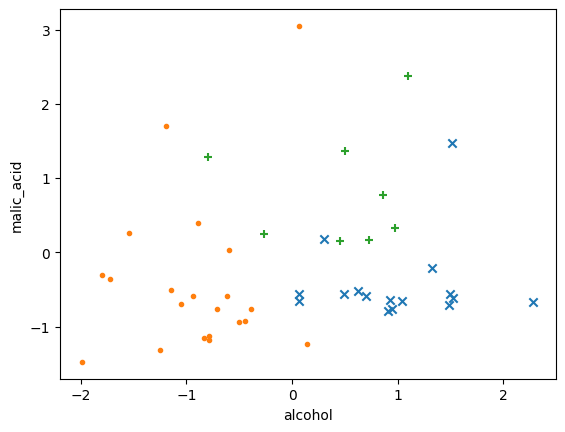

In [56]:
axis_1 = 0; # アルコール濃度
axis_2 = 1; # リンゴ酸濃度

x = x_test # テストデータの説明変数
y = y_test # テストデータの分類結果

# 0に分類されたグループ
group_0 = x[y==0]
plt.scatter(group_0[:, axis_1], group_0[:, axis_2], marker="x")

# 1に分類されたグループ
group_1 = x[y==1]
plt.scatter(group_1[:, axis_1], group_1[:, axis_2], marker=".")

# 2に分類されたグループ
group_2 = x[y==2]
plt.scatter(group_2[:, axis_1], group_2[:, axis_2], marker="+")


plt.xlabel(wine.feature_names[axis_1])
plt.ylabel(wine.feature_names[axis_2])
plt.show()